<a href="https://colab.research.google.com/github/ranvirsingh603/md-file/blob/master/house_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#house price prediction

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('kc_house_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.drop(['id', 'date', 'sqft_lot', 'waterfront', 'condition', 'sqft_basement', 'yr_renovated','zipcode', 'lat', 'long', 'sqft_living15' ], axis = 1, inplace = True)



In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,yr_built,sqft_lot15
0,221900.0,3,1.00,1180,1.0,0,7,1180,1955,5650
1,538000.0,3,2.25,2570,2.0,0,7,2170,1951,7639
2,180000.0,2,1.00,770,1.0,0,6,770,1933,8062
3,604000.0,4,3.00,1960,1.0,0,7,1050,1965,5000
4,510000.0,3,2.00,1680,1.0,0,8,1680,1987,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   view         21613 non-null  int64  
 6   grade        21613 non-null  int64  
 7   sqft_above   21613 non-null  int64  
 8   yr_built     21613 non-null  int64  
 9   sqft_lot15   21613 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [ ]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,yr_built,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.234303,7.656873,1788.390691,1971.005136,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.766318,1.175459,828.090978,29.373411,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,1.000000,290.000000,1900.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,7.000000,1190.000000,1951.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,7.000000,1560.000000,1975.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,8.000000,2210.000000,1997.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,4.000000,13.000000,9410.000000,2015.000000,871200.000000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5073a24d0>,
      dtype=object)

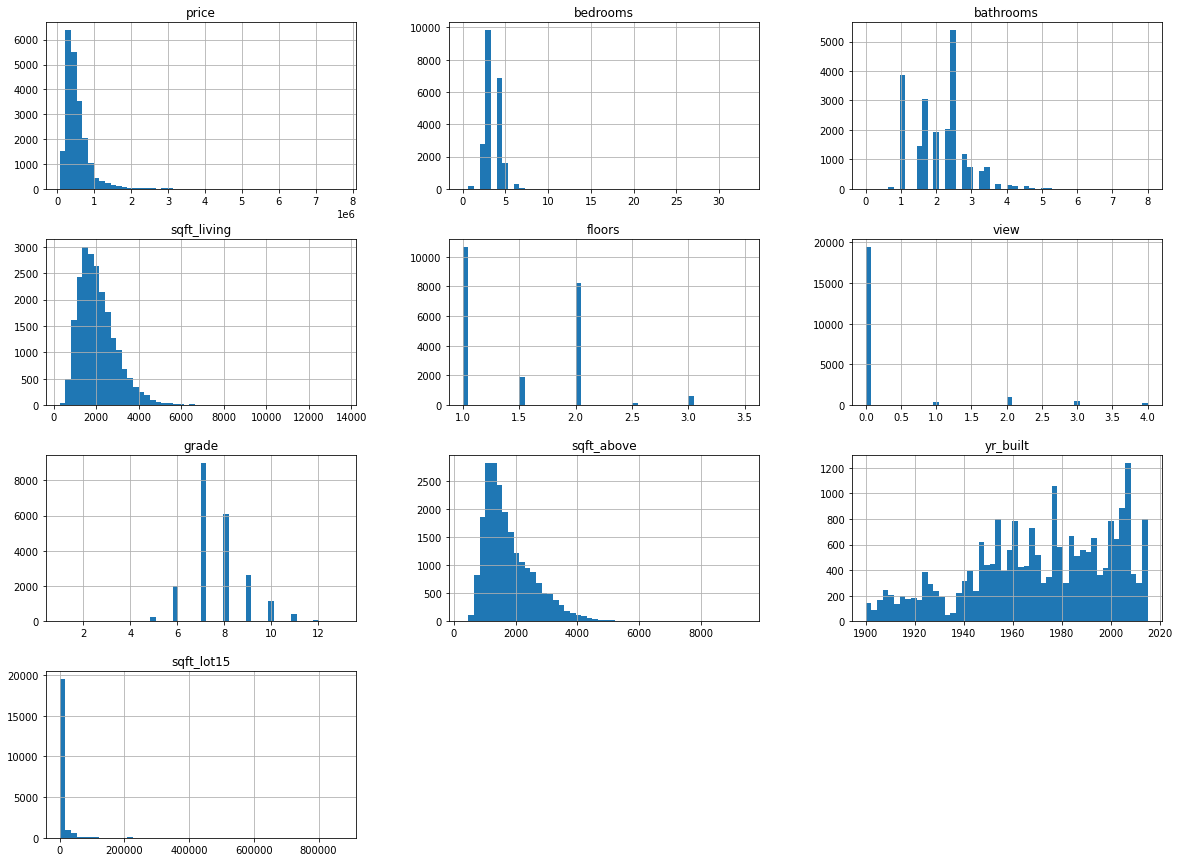

In [ ]:



df.hist(bins=50, figsize=(20,15))

In [ ]:
df.corr()['sqft_living']

price          0.702035
bedrooms       0.576671
bathrooms      0.754665
sqft_living    1.000000
floors         0.353949
view           0.284611
grade          0.762704
sqft_above     0.876597
yr_built       0.318049
sqft_lot15     0.183286
Name: sqft_living, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state = 42)
print(f"length of training data:{len(train_set)}")
print(f"length of teting data:{len(test_set)}")

length of training data:17290
length of teting data:4323


In [ ]:
df=train_set.copy()

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,yr_built,sqft_lot15
6325,325000.0,3,1.75,1780,1.0,0,9,1780,1983,13095
13473,257000.0,2,1.00,1000,1.0,0,6,800,1929,5000
17614,228500.0,3,1.00,1080,1.5,0,6,990,1942,7800
16970,288000.0,3,2.25,2090,1.0,0,7,1280,1977,7350
20868,479000.0,2,2.50,1741,2.0,0,8,1446,2007,10454


In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix['price'].sort_values(ascending = False)

price          1.000000
sqft_living    0.701701
grade          0.665093
sqft_above     0.603255
bathrooms      0.526618
view           0.392108
bedrooms       0.308262
floors         0.253425
sqft_lot15     0.079152
yr_built       0.049100
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5063f6e50>,
      dtype=object)

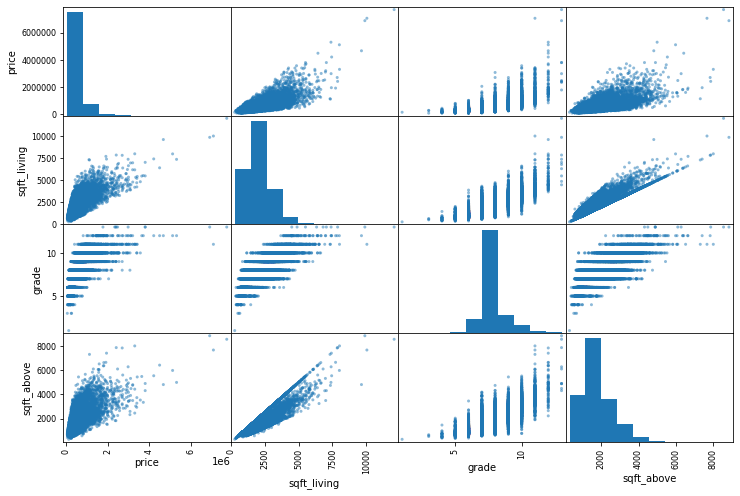

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["price", "sqft_living" ,"grade", "sqft_above"]
scatter_matrix(df[attributes], figsize=(12,8))

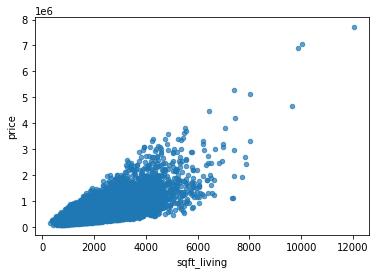

In [ ]:
df.plot(kind="scatter", x="sqft_living", y="price", alpha = 0.7)

In [ ]:
df=train_set.drop("price", axis=1)
df_labels = train_set["price"].copy()

##preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([3.000e+00, 2.250e+00, 1.910e+03, 1.500e+00, 0.000e+00, 7.000e+00,
       1.560e+03, 1.975e+03, 7.615e+03])

In [ ]:
x=imputer.transform(df)

In [ ]:
df_tr=pd.DataFrame(x, columns=df.columns)

In [ ]:
df_tr.describe()

,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,yr_built,sqft_lot15
count,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,3.368132,2.113794,2073.894910,1.499161,0.233025,7.653846,1785.962175,1971.108329,12725.059341
std,0.931385,0.766790,907.297963,0.542819,0.761749,1.170355,821.626290,29.435603,27525.258285
min,0.000000,0.000000,290.000000,1.000000,0.000000,1.000000,290.000000,1900.000000,651.000000
25%,3.000000,1.500000,1430.000000,1.000000,0.000000,7.000000,1200.000000,1951.000000,5083.000000
50%,3.000000,2.250000,1910.000000,1.500000,0.000000,7.000000,1560.000000,1975.000000,7615.000000
75%,4.000000,2.500000,2540.000000,2.000000,0.000000,8.000000,2200.000000,1997.000000,10046.000000
max,33.000000,8.000000,12050.000000,3.500000,4.000000,13.000000,8860.000000,2015.000000,871200.000000


#Creating pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler())])

In [ ]:
df_num_tr = my_pipeline.fit_transform(df)

In [ ]:
df_num_tr.shape

(17290, 9)

##Selecting a desired model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = DecisionTreeRegressor()
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(df_num_tr, df_labels)

RandomForestRegressor()

In [ ]:
some_data = df.iloc[:5]

In [ ]:
some_labels = df_labels.iloc[:5]

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:

model.predict(prepared_data)

array([380443.25, 298230.5 , 247515.5 , 329832.  , 464300.5 ])

In [ ]:
list(some_labels)

[325000.0, 257000.0, 228500.0, 288000.0, 479000.0]

##Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(df_num_tr)
mse = mean_squared_error(df_labels, housing_predictions)
rmse = np.sqrt(mse)

In [ ]:
mse

5128198413.864291

##Using better evaluation technique - cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_num_tr, df_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([189828.76551904, 216293.59212301, 178638.60689398, 194739.5849932 ,
       182564.09267311, 200050.63028311, 180108.38443537, 183009.83508257,
       191092.45210884, 174142.1553365 ])

In [ ]:
from joblib import dump, load
dump(model, 'kc.joblib')

['kc.joblib']

In [ ]:
x_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

220778.14492997967

In [ ]:
prepared_data[0]

array([-0.39526335, -0.47445144, -0.32393262, -0.91959976, -0.30591651,
        1.15024328, -0.00725676,  0.40400107,  0.01344043])

In [ ]:
prepared_data

array([[-0.39526335, -0.47445144, -0.32393262, -0.91959976, -0.30591651,
         1.15024328, -0.00725676,  0.40400107,  0.01344043],
       [-1.46896378, -1.45258323, -1.18365301, -0.91959976, -0.30591651,
        -1.41315603, -1.20004764, -1.43056508, -0.28066159],
       [-0.39526335, -1.45258323, -1.09547656,  0.00154501, -0.30591651,
        -1.41315603, -0.96879226, -0.98891026, -0.1789339 ],
       [-0.39526335,  0.17763643,  0.01775112, -0.91959976, -0.30591651,
        -0.55868959, -0.61582354,  0.20016039, -0.19528299],
       [-1.46896378,  0.50368036, -0.36691864,  0.92268978, -0.30591651,
         0.29577684, -0.41377937,  1.21936381, -0.08251058]])

In [ ]:
features = np.array([[-0.39526335, -0.47445144, -0.32393262, -0.91959976, -0.30591651,
        1.15024328, -0.00725676,  0.40400107,  0.01344043]])
model.predict(features)

array([380433.25])